In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
Base.metadata.tables.keys()

dict_keys(['measurement', 'station'])

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

recent_date

('2017-08-23',)

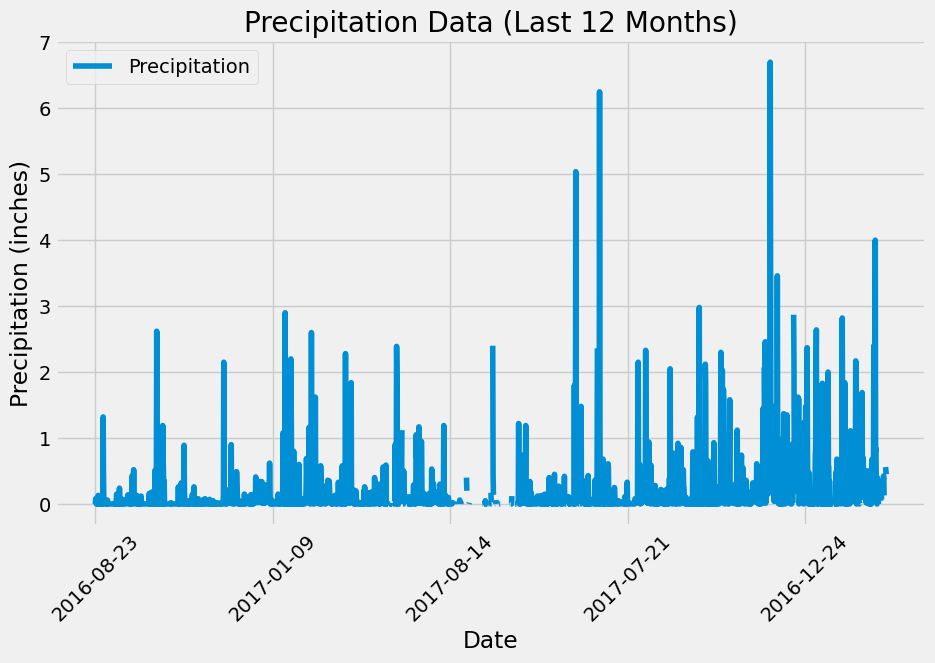

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

date_strip = dt.datetime.strptime(recent_date.date,'%Y-%m-%d').date()
# Calculate the date one year from the last date in data set.
date_set = date_strip - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_query = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= date_set).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_query, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precip_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x='Date', y='Precipitation', figsize=(10, 6), legend=True, rot=45)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation Data (Last 12 Months)")
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(station)

stations.count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).\
    all()

for station in active_stations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [14]:
active_stations[0]

('USC00519281', 2772)

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).\
    first()

most_active = most_active[0]

low_temp = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == most_active).scalar()

high_temp = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == most_active).scalar()

avg_temp = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == most_active).scalar()

print(f'ID: {most_active}')
print(f'Low Temp: {low_temp}')
print(f'High Temp: {high_temp}')
print(f'Avg Temp: {avg_temp}')

ID: USC00519281
Low Temp: 54.0
High Temp: 85.0
Avg Temp: 71.66378066378067


In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]

past_year = dt.datetime.strptime(date, '%Y-%m-%d') - dt.timedelta(days=365)

temp = session.query(measurement.tobs).\
        filter(measurement.station == most_active).\
        filter(measurement.date >= past_year)

temp_df = pd.DataFrame(temp)


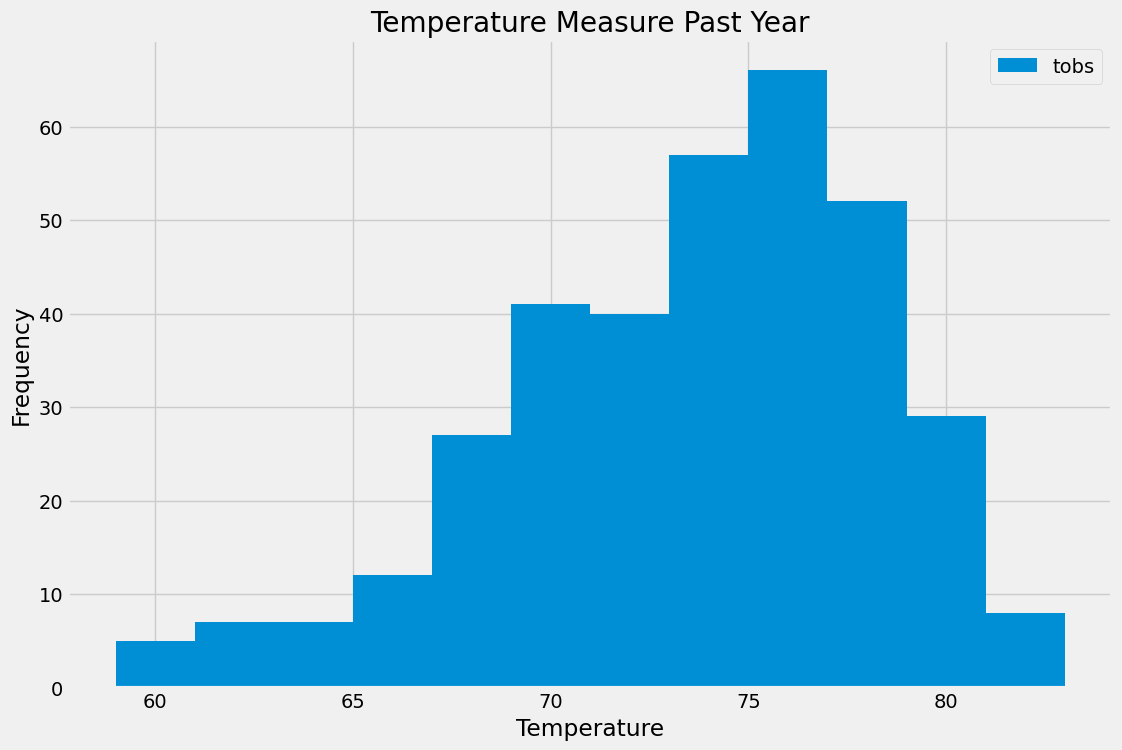

In [17]:
temp_df.hist(bins=12, figsize=(12,8))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.title('Temperature Measure Past Year')
plt.show()

# Close Session

In [18]:
# Close Session
session.close()